# Problem 5

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from time import time 
from sklearn import metrics


dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
target_group = labels
true_k = np.unique(labels).shape[0]

vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
X = vectorizer.fit_transform(dataset.data)
print(X.shape)
print(true_k)

18846 documents
20 categories

(18846, 52295)
20


In [17]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=200, n_init=30)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Shape of Contingency Matrix: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_)) 
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=20, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
done in 2285.602s

Shape of Contingency Matrix: [[  0  95  14   1 231  32   0  23   0 176   0   0 150   0   0  38   0   0
   38   1]
 [  6  89   1   0 198   7   0  17   0   1   8   0   0   0  41 589   0   0
    0  16]
 [  3  64   0   0 133  13   0  13   0   0  28  11   0   0 520 198   0   0
    0   2]
 [ 14 146   0   0 157  30   0   8   0   0  17 211   0   0  72 313   0   2
    0  12]
 [ 27  99   0   0 303  26   0  22   0   0   7  87   0   0   8 372   0   0
    0  12]
 [  5  98   0   2  97   4   0   3   0   0  11   0   0   0  62 677   0   0
    0  29]
 [506  95   2   0 197  14   0   4   0   0  31  49   0   0  12  53   0   8
    0   4]
 [ 34 177   4   0 216  21   0  41   0   0 470   0   0   0   2  16   0   0
    0   9]
 [ 17 510   0   0 288   9   0  11   0   0  81   0   0   0  

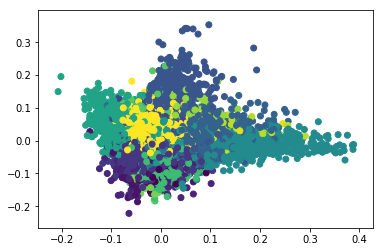

Shape of Contingency Matrix with nmf: [[  0   0  26 160  65   1 262   1   0 144   0   0   1   0   0   0   2  41
    0  96]
 [  0   2   7 261  80   0   4  15   0   1   1 103   8   0   2   3   1   0
    0 485]
 [  0   2  14 164  38   0   2   3   0   0   0 530   7   0  11   2   0   0
    0 212]
 [  0   3  29 157  29   0   0  12   0   0   2 405  11   3   5   2   0   0
    0 324]
 [  0  14  23 403  24   0   1  13   0   0   0 141   1   0   1   2   0   0
    0 340]
 [  0   2   4 158  89   4   1  28   0   0   0  85   9   0   2   2   0   0
    0 604]
 [  0  32  14 441   5   0   0   4   0   0  35 106   4  14   7   9   5   0
    0 299]
 [  0  28  19 183  16   0  14   9   0   0 522   2  14   0   0   1   3   0
    0 179]
 [  0   6   9 119  83   0   7  18   0   0 561   0  10   0   1   9   0   0
    0 173]
 [  0   7   2 371   2   0   6   4   0   0   1   0   2 406   1   1   4   0
    0 187]
 [  0   6   5 114   2   0   3   4   0   0   1   0   4 746   0  29   0   0
    0  85]
 [  0   8   0  96  51 527  

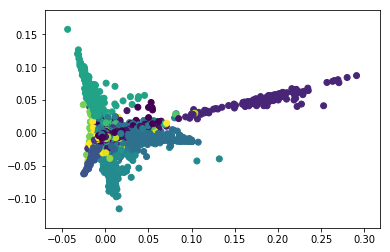

In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
    
#-------------------------------svd--------------------------------------
    
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(X)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=30)
km.fit(X_svd)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_svd)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_svd))
plt.show()

# plot_clusters(target_group, clustered_labels, X_svd, centers, 'TruncatedSVD')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

#-------------------------------nmf--------------------------------------
nmf = NMF(n_components=20,init = 'nndsvd', random_state=42)
X_nmf = nmf.fit_transform(X)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=30)
km.fit(X_nmf)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_nmf))
# plot_clusters(target_group, clustered_labels, X_nmf, centers, 'NMF')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))


Shape of Contingency Matrix with svd: [[ 64 101   0  70   0 156   0  84   1   0  16   0  38   0   2 137   1 129
    0   0]
 [ 75  14 162  87   0 211   0 396   0   2   7   0   0   0   1   0  17   1
    0   0]
 [ 48  10 573  30  10  98   0 193   0   2  15   0   0   0   0   0   6   0
    0   0]
 [125  10 121  28 189 139   0 326   0   3  30   0   0   0   0   0   7   0
    0   4]
 [ 89  19  32  24  76 310   0 365   0  14  22   0   1   0   0   0  10   0
    0   1]
 [108   2 236  86   0 122   0 402   1   2   4   0   0   0   0   0  25   0
    0   0]
 [116   8  24   5  49 362   0 341   0  33  14   0   1   0   4   0   7   0
    0  11]
 [366 142   2  26   0 235   0 157   0  31  21   0   0   0   3   0   7   0
    0   0]
 [493  59   0 110   0 163   0 140   0   6   9   0   0   0   0   0  15   0
    0   1]
 [135  27   0   2   0 295   0 155   0   7   1   0   0   0   4   0   3   0
    0 365]
 [ 31   2   0   2   0 114   0 106   0   6   5   0   0   0   0   0   3   0
    0 730]
 [113  68  10  50   0  92  

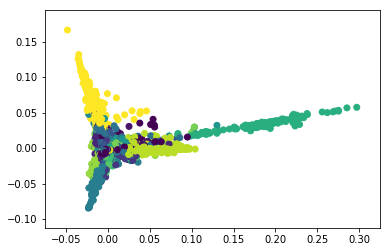

In [11]:
#-------------------------------svd normalizer--------------------------------------
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svd = TruncatedSVD(n_components=20)
svd_norm = make_pipeline(svd,StandardScaler(with_mean=False))
X_svd_norm = svd_norm.fit_transform(X)

km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
km.fit(X_svd_norm)
clustered_labels = km.labels_
centers = km.cluster_centers_

pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_svd_norm))
# plot_clusters(target_group, clustered_labels, X_svd_norm, centers, 'TruncatedSVD with normalization')

print("Shape of Contingency Matrix with svd: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

Shape of Contingency Matrix with nmf: [[132   0 159   0  37  94   0  12   0   1   2   1   0   0   1 130  67  91
    0  72]
 [  1 338 368   0   0  15   0   7   0  16   1   2   2   0   0  10  84   0
    0 129]
 [  0 637 190   0   0  11   0  15   0   2   0  13   2   0   0   1  36   0
    0  78]
 [  0 454 253   0   0  12   0  29   0  10   0   3   3   0   0   6  36   0
    4 172]
 [  0 229 520   0   0  21   0  23   0  11   0   1  14   0   0   1  26   0
    2 115]
 [  0 409 265   0   0   6   0   4   0  28   0   2   2   0   4   4  89   0
    0 175]
 [  0 116 595   0   0  15   0  14   0   4   5   7  33   0   0   1   5   0
   15 165]
 [  0   3 320   0   0 239   0  20   0  11   3   0  31   0   0   5  26   0
    2 330]
 [  0   1 258   0   0 113   0   9   0  20   0   1   6   0   0   2 102   0
    2 482]
 [  0   0 415   0   0  33   0   2   0   4   4   1   7   0   0  13   2   0
  368 145]
 [  0   0 165   0   0   6   0   6   0   4   0   0   6   0   0   4   2   0
  760  46]
 [  0  22 145   1   0  79  

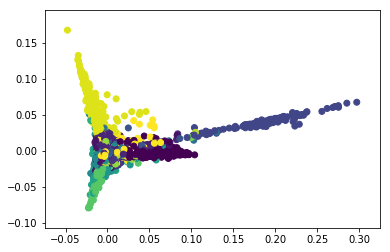

In [16]:
#-------------------------------nmf normalizer--------------------------------------

nmf = NMF(n_components=20,init = 'nndsvd', random_state=42)
nmf_norm = make_pipeline(nmf,StandardScaler(with_mean=False))
X_nmf_norm = nmf_norm.fit_transform(X)

km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
km.fit(X_nmf_norm)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_nmf_norm))
# plot_clusters(target_group, clustered_labels, X_nmf_norm, centers, 'NMF with normalization')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

Shape of Contingency Matrix with nmf: [[  0   1  39  24  50  16 169   5 435  18   0   0   3   5   1   7   1  10
    1  14]
 [335 164   9  23 116  34   1  23   5  13   0  56   1 165   2   1  14   0
    3   8]
 [429 267  24   9  56  19   0   5   0   4   9  89   0  63   2   0   6   0
    2   1]
 [ 67 194  42   9  36  21   0  11   0  13 229 256   0  83   3   0   7   1
    3   7]
 [ 50  81  37  20  30  60   0  12   0  13 105 469   1  66   2   1  10   0
    4   2]
 [342 322   8  14 116  14   1  31   0   8   0   5   0 103   9   0   7   0
    2   6]
 [ 44  70  15  30   8 219   4  15   0  52 106 209   8  95   3   1  56   0
   38   2]
 [ 10  22  38  20  33 242   1  39   2 392  13  10  10  32   4   5  76   1
    4  36]
 [  4  19  15  13 114 141  16  29   2 373  25   3   0  25   1   0 158   0
    6  52]
 [ 10   4  11   8   2  46   0   8   0   8   0   0   5  10   0   2 342   0
  526  12]
 [  2   1  13   1   3   6   0   7   0   1   0   0   0   5   0   1 268   1
  689   1]
 [ 10  14   0  28  51  15  

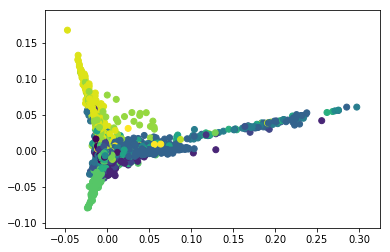

In [13]:
#-------------------------------nmf Logarithm--------------------------------------

nmf = NMF(n_components=20,init = 'nndsvd', random_state=42)
X_nmf = nmf.fit_transform(X)
X_nmf_log = np.log(X_nmf+0.001)
#logtransformer = FunctionTransformer(np.log1p)
#X_nmf_log = logtransformer.transform(X_nmf)

km.fit(X_nmf_log)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_nmf_log))
# plot_clusters(target_group, clustered_labels, X_nmf_log, centers, 'NMF with Logarithm')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

Shape of Contingency Matrix with nmf: [[  1   3   1   2   1 177  34   3  27  58   0   5   0   4  22   1  31   3
   16 410]
 [ 14  62   3   6 131   1   4 234  19 109   7   0 182  18  20   2  10 145
    0   6]
 [  7  53   1   1 110   0   1 285  13  46  25   0 227   4   3   1   1 207
    0   0]
 [ 30 100   4   8  96   0   2  93  17  43 332   0  41  16   9   4   7 179
    1   0]
 [ 33  79   0  13 274   0   7  91  18  34 248   0  24  10  45   4  14  69
    0   0]
 [ 10  58   9   4  52   1   2 219  15 113   0   0 192  24   8   0   9 272
    0   0]
 [ 75  57   2  56  90   1  15 103  63   8 222   6   7  11 118  38  23  80
    0   0]
 [ 58  98   1  28  30   0 162   8 358  34   4   7   0  33 120   2  16  26
    2   3]
 [ 36  83   1  91  15   8 231   4 291 116  16   0   0  27  34   4  17  19
    0   3]
 [ 16   5   0 313   3   0  15  12  37   2   0   5   1   9  46 502  20   5
    0   3]
 [ 16   2   0 285   1   0   2   1   3   2   0   0   2  10   4 666   2   2
    1   0]
 [ 17  30 692   2  17   0  

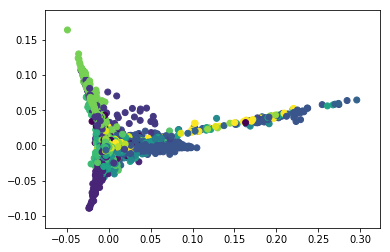

In [14]:
#-------------------------------nmf norm + log--------------------------------------

nmf = NMF(n_components=20,init = 'nndsvd', random_state=42)
nmf_norm = make_pipeline(nmf,StandardScaler(with_mean=False))
X_nmf_norm = nmf_norm.fit_transform(X)

X_nmf_norm_log = np.log(X_nmf_norm+0.1)


km.fit(X_nmf_norm_log)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_nmf_norm_log))
# plot_clusters(target_group, clustered_labels, X_nmf_norm_log, centers, 'NMF + norm + log')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))

Shape of Contingency Matrix with nmf: [[  1  31   1   0 169  34   1   1   5   5   4  29   1  16  60 405  25   2
    3   6]
 [ 19  10   5  25   1  31   8   2   0  17  27  21   7   0 113   6   9 345
  162 165]
 [ 43   5   0  47   0  14   7   1   0   9   9  13  18   0  54   0  22 420
  240  83]
 [249   4   2 317   0   8   9   4   0  18  17  19  11   1  43   0  37  87
   72  84]
 [421   7   3 137   0  38   9   1   1  35  14  24   6   0  36   1  36  62
   27 105]
 [  2   4   0  13   1  10   8  12   0  13  35  16   3   0 122   0   7 311
  340  91]
 [316  15  32  92   1  87  59   2   6  82  11  80  21   0   8   0  14  54
   30  65]
 [  9 208   4  13   0 117  24   1   7  73  34 355   5   2  34   4  34  11
   22  33]
 [ 11 264   6  15  11  40  98   1   0  51  30 291   4   0 107   3  14   2
   16  32]
 [  0  11 512   0   0  38 310   0   5  21  10  45   3   0   2   3   9  12
    5   8]
 [  0   1 657   0   0   3 291   0   0  13  10   4   2   1   2   0  10   1
    3   1]
 [  0   9   0   5   0  47  

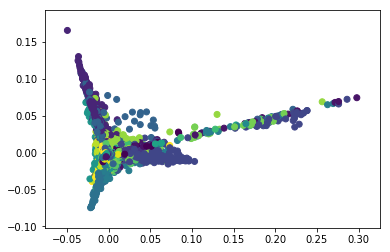

In [15]:
#-------------------------------nmf log + norm--------------------------------------

nmf = NMF(n_components=20,init = 'nndsvd', random_state=42)
X_nmf = nmf.fit_transform(X)

X_nmf_log = np.log(X_nmf+0.01)

scaler = StandardScaler(with_mean=False)
X_nmf_log_norm = scaler.fit_transform(X_nmf_log)


km.fit(X_nmf_log_norm)
clustered_labels = km.labels_
centers = km.cluster_centers_
pca = PCA(n_components=2).fit_transform(X_nmf)
fig = plt.figure()
plt.scatter(pca[:,0], pca[:,1], c = km.fit_predict(X_nmf_norm_log))
# plot_clusters(target_group, clustered_labels, X_nmf_log_norm, centers, 'NMF + Log + norm')

print("Shape of Contingency Matrix with nmf: %s" %metrics.cluster.contingency_matrix(target_group, km.labels_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target_group, km.labels_)) 
print("Completeness: %0.3f" % metrics.completeness_score(target_group, km.labels_)) 
print("V-measure: %0.3f" % metrics.v_measure_score(target_group, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(target_group, km.labels_))
print("Adjusted mutual information: %.3f" 
      %metrics.adjusted_mutual_info_score(target_group, km.labels_))